In [4]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

C:\Users\himan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\himan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\himan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\himan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [5]:

def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@',text.split()))
    
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [6]:
text = "Hi I'm extremely felling well https://google.com you are good"
cleaned_text = clean_text(text)
print(cleaned_text)

hi i am extremely felling well you are good


In [13]:
data1 = pd.read_json('D:\Project\Sarcasm Detection\Sarcasm_Headlines_Dataset.json',lines=True)

In [14]:
data2 = pd.read_json('D:\Project\Sarcasm Detection\Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [15]:
data1

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [17]:
data =  pd.concat([data1, data2])
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(df):
    head_lines = []
    lines = df['headline'].values.tolist()
    
    for line in lines:
        line = clean_text(line)
        tokens = word_tokenize(line)
        table = str.maketrans('','',string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(data)


In [26]:
head_lines[:10]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages']]

(-0.5, 999.5, 499.5, -0.5)

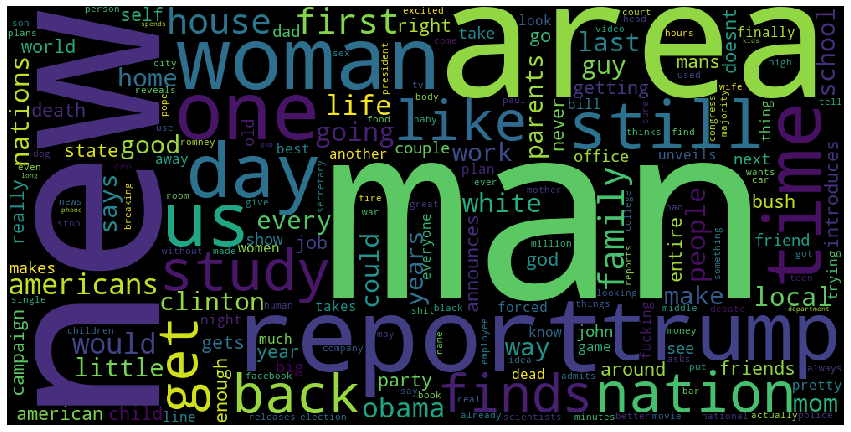

In [27]:
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator
pos_data = data.loc[data['is_sarcastic']==1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub]
word_cloud_dict = Counter(pos_lines)

wordcloud = WordCloud(width = 1000,height = 500).generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [28]:
validation_split = 0.2
max_length = 50

In [29]:
tokenizer_obj = Tokenizer()

In [31]:
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

In [32]:
word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1

unique tokens -  28657


In [33]:
lines_pad = pad_sequences(sequences,maxlen=max_length,padding='post')
sentiment = data["is_sarcastic"].values

In [35]:
indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

In [36]:
num_validation_samples = int(validation_split * lines_pad.shape[0])

In [58]:
X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [65]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (44263, 50)
Shape of y_train: (44263,)
Shape of X_test_pad: (11065, 50)
Shape of y_test: (11065,)


In [60]:
embeddings_index = {}
embedding_dim = 200
GLOVE_DIR = "C:\\Users\\himan\\Downloads\\glove.twitter.27B"
f = open(os.path.join(GLOVE_DIR,'glove.twitter.27B.200d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors. ' %len(embeddings_index))

Found 1193514 word vectors. 


In [61]:
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))

In [62]:
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

24755


In [63]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False
                           )

In [68]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(256, dropout=0.3,recurrent_dropout=0.25))# 128-256 & 0.2-0.3
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 200)           5731600   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               467968    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 6,199,825
Trainable params: 468,225
Non-trainable params: 5,731,600
_________________________________________________________________
None


In [71]:
history = model.fit(X_train_pad, y_train, batch_size=48, epochs=100, validation_data=(X_test_pad,y_test),verbose=1)

Train on 44263 samples, validate on 11065 samples
Epoch 1/100
44263/44263 [==============================] - 183s 4ms/step - loss: 0.1906 - accuracy: 0.9241 - val_loss: 0.1601 - val_accuracy: 0.9406
Epoch 2/100
44263/44263 [==============================] - 198s 4ms/step - loss: 0.1836 - accuracy: 0.9260 - val_loss: 0.1618 - val_accuracy: 0.9373
Epoch 3/100
44263/44263 [==============================] - 193s 4ms/step - loss: 0.1773 - accuracy: 0.9303 - val_loss: 0.1480 - val_accuracy: 0.9481
Epoch 4/100
44263/44263 [==============================] - 194s 4ms/step - loss: 0.1706 - accuracy: 0.9321 - val_loss: 0.1445 - val_accuracy: 0.9493
Epoch 5/100
44263/44263 [==============================] - 194s 4ms/step - loss: 0.1643 - accuracy: 0.9350 - val_loss: 0.1537 - val_accuracy: 0.9476
Epoch 6/100
44263/44263 [==============================] - 193s 4ms/step - loss: 0.1646 - accuracy: 0.9353 - val_loss: 0.1342 - val_accuracy: 0.9542
Epoch 7/100
44263/44263 [==============================]

44263/44263 [==============================] - 173s 4ms/step - loss: 0.0879 - accuracy: 0.9666 - val_loss: 0.1123 - val_accuracy: 0.9710
Epoch 56/100
44263/44263 [==============================] - 177s 4ms/step - loss: 0.0863 - accuracy: 0.9670 - val_loss: 0.1048 - val_accuracy: 0.9699
Epoch 57/100
44263/44263 [==============================] - 176s 4ms/step - loss: 0.0885 - accuracy: 0.9681 - val_loss: 0.1083 - val_accuracy: 0.9706
Epoch 58/100
44263/44263 [==============================] - 176s 4ms/step - loss: 0.0891 - accuracy: 0.9669 - val_loss: 0.1106 - val_accuracy: 0.9695
Epoch 59/100
44263/44263 [==============================] - 175s 4ms/step - loss: 0.0843 - accuracy: 0.9683 - val_loss: 0.1134 - val_accuracy: 0.9699
Epoch 60/100
44263/44263 [==============================] - 176s 4ms/step - loss: 0.0885 - accuracy: 0.9674 - val_loss: 0.1143 - val_accuracy: 0.9693
Epoch 61/100
44263/44263 [==============================] - 176s 4ms/step - loss: 0.0831 - accuracy: 0.9688 - val

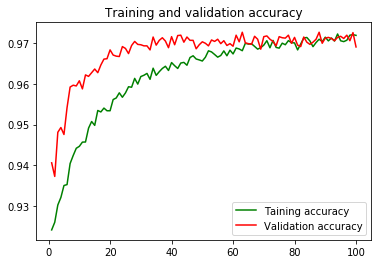

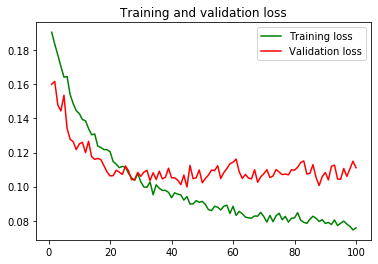

In [72]:
###Visualise

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,'g',label='Taining accuracy')
plt.plot(epochs, val_accuracy,'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss , 'g', label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [73]:
!mkdir -p saved_model

In [74]:
model.save('saved_model/sarcasm_model')

In [75]:

def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

In [76]:
predict_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.")

"It's a sarcasm!"

In [77]:
predict_sarcasm("You just broke my car window. Great job.")

"It's a sarcasm!"

In [78]:
predict_sarcasm("I want a million dollars!")

"It's not a sarcasm."

In [79]:
predict_sarcasm("You just saved my dog's life. Thanks a million.")

"It's not a sarcasm."

In [80]:
predict_sarcasm("I just won a million dollars!")

"It's a sarcasm!"

In [81]:
predict_sarcasm("His name is Bob. He is a nice person.")# Incorrect

"It's a sarcasm!"

In [82]:
predict_sarcasm("Sarcasm is very easy to detect.") #Incorrect

"It's not a sarcasm."

In [83]:
predict_sarcasm("Life is hard. It's harder if you're stupid")

"It's not a sarcasm."

In [84]:
predict_sarcasm("Some people are just beautifully wrapped boxes os shit.")

"It's a sarcasm!"

In [90]:
predict_sarcasm("Unless your name is Google stop acting like you know everything")

"It's a sarcasm!"

In [91]:
predict_sarcasm("Cancel my subscription because I don’t need your issues")

"It's a sarcasm!"

In [92]:
predict_sarcasm("If had a dollar for every smart thing you say. I’ll be poor.")

"It's a sarcasm!"

In [93]:
predict_sarcasm("I’m sorry I hurt your feelings when I called you stupid. I really thought you already knew.")

"It's a sarcasm!"

In [94]:
predict_sarcasm("People say that laughter is the best medicine… your face must be curing the world.")

"It's not a sarcasm."

In [95]:
predict_sarcasm("My imaginary friend says that you need a therapist.")

"It's a sarcasm!"

In [97]:
predict_sarcasm("Well at least your mom thinks you’re pretty.")

"It's a sarcasm!"

In [99]:
predict_sarcasm("My boss said I intimidate my co-workers. I stared at him until he apologized.")

"It's a sarcasm!"

In [100]:
predict_sarcasm("Ninety-nine percent of lawyers give the rest a bad name.")

"It's a sarcasm!"

In [101]:
predict_sarcasm("My boss told me to have a good day so I went home.")

"It's a sarcasm!"

In [102]:
predict_sarcasm("After Monday and Tuesday even the calendar says WTF.")

"It's not a sarcasm."

In [103]:
predict_sarcasm("This place is so weird that the cockroaches have moved next door.")

"It's a sarcasm!"

In [106]:
predict_sarcasm("I found your nose. It was in my business")

"It's not a sarcasm."